# Churners classification

### libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### dataset

In [104]:
file_url = '/Users/santiagocardenas/Documents/MDSI/202402/Statistical thinking for data science/STDS-at3/dataset_cleaned.csv'
data = pd.read_csv(file_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41175 entries, 0 to 41174
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41175 non-null  int64  
 1   job             41175 non-null  object 
 2   marital         41175 non-null  object 
 3   education       41175 non-null  object 
 4   default         41175 non-null  object 
 5   housing         41175 non-null  object 
 6   loan            41175 non-null  object 
 7   contact         41175 non-null  object 
 8   month           41175 non-null  object 
 9   day_of_week     41175 non-null  object 
 10  duration        41175 non-null  int64  
 11  campaign        41175 non-null  int64  
 12  pdays           41175 non-null  int64  
 13  previous        41175 non-null  int64  
 14  poutcome        41175 non-null  object 
 15  emp.var.rate    41175 non-null  float64
 16  cons.price.idx  41175 non-null  float64
 17  cons.conf.idx   41175 non-null 

In [105]:
data.columns = data.columns.str.replace('.', '_') 

/var/folders/wv/tct1f2g5605fttplsk9y_gzh0000gn/T/ipykernel_2132/1753127780.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.replace('.', '_')


### data cleaning

#### duplicated values

In [106]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1262,39,blue-collar,married,basic,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12255,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14228,27,technician,single,professional course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16950,47,technician,divorced,high school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18459,32,technician,single,professional course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20210,55,services,married,high school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20528,41,technician,married,professional course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25210,39,admin,married,university degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28469,24,services,single,high school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32241,49,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no


In [107]:
data.drop_duplicates(inplace=True)
data.shape

(41160, 21)

#### missing values

In [108]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

there are no missing values

### initial feature selection

#### categorical columns

In [109]:
churn_dict = {
    'no' : 0,
    'yes' : 1
}
data['y'] = data['y'].map(churn_dict)
data['y'] = data['y'].astype('int')

cat_cols = data.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    data[col] = data[col].astype('category')
data.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
y                    int64
dtype: object

In [110]:
data['education'] = data['education'].cat.reorder_categories(
    new_categories = ['unknown', 'illiterate', 'basic', 'high school', 'professional course', 'university degree'],
    ordered = True
)
data.education.unique()

['basic', 'high school', 'professional course', 'unknown', 'university degree', 'illiterate']
Categories (6, object): ['unknown' < 'illiterate' < 'basic' < 'high school' < 'professional course' < 'university degree']

In [111]:
data['month'] = data['month'].cat.reorder_categories(
    new_categories = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    ordered = True
)
data.month.unique()

['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Categories (10, object): ['mar' < 'apr' < 'may' < 'jun' ... 'sep' < 'oct' < 'nov' < 'dec']

In [112]:
data['day_of_week'] = data['day_of_week'].cat.reorder_categories(
    new_categories = ['mon', 'tue', 'wed', 'thu', 'fri'],
    ordered = True
)
data.day_of_week.unique()

['mon', 'tue', 'wed', 'thu', 'fri']
Categories (5, object): ['mon' < 'tue' < 'wed' < 'thu' < 'fri']

In [113]:
from scipy.stats import chi2_contingency
def statistical_test_categorical(df, target, column):
    _, p_value, _, _ = chi2_contingency(pd.crosstab(df[target], df[column]))
    return p_value
    
relevant_cat_cols = []
for col in cat_cols:
    p_value = statistical_test_categorical(data, 'y', col)
    if p_value < 0.05:
        relevant_cat_cols.append(col)

print(relevant_cat_cols)
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


only 'loan' does not display influence on churn according to the test

#### numerical cols

In [114]:
num_cols = data.select_dtypes(include='number').columns.tolist()
num_cols.remove('y')

from scipy.stats import mannwhitneyu
def statistical_test_numerical(df, target, column):
    _, p_value = mannwhitneyu(df[df[target] == 0][column], df[df[target] == 1][column])
    return p_value

rel_num_cols = []
for col in num_cols:
    p_value = statistical_test_numerical(data, 'y', col)
    if p_value < 0.05:
        rel_num_cols.append(col)

print(rel_num_cols)
print(num_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


all of the numerical features display a statistical difference between the two targe populations

#### correlation analysis

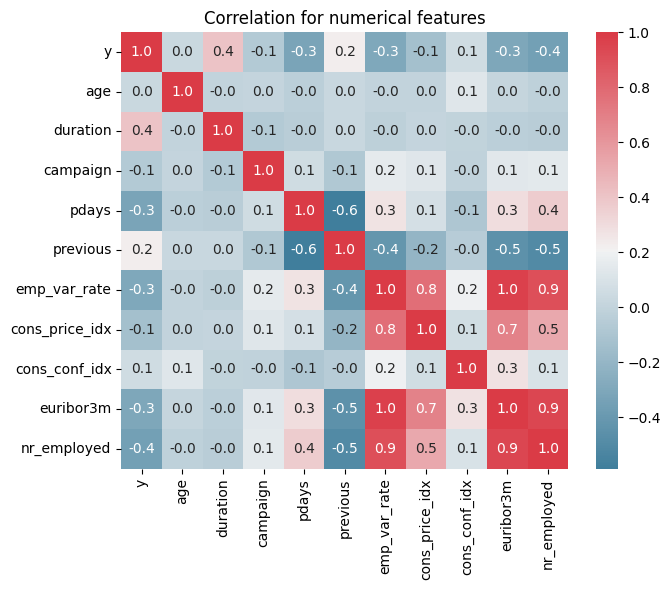

In [115]:
cols_to_plot = ['y'] + rel_num_cols
fig, axis = plt.subplots(1, 1, figsize=(7, 6))
sns.despine(fig)
sns.heatmap(data[cols_to_plot].corr(), cmap = sns.diverging_palette(230, 10, n=1001), ax = axis, annot=True, fmt = '.1f')
axis.set_title('Correlation for numerical features')
plt.tight_layout()

In [116]:
correlations = data[cols_to_plot].corr()
filtered_corr = correlations[abs(correlations) > 0.50]
filtered_corr = filtered_corr.where(~np.eye(filtered_corr.shape[0], dtype=bool))
filtered_corr_pairs = filtered_corr.stack().reset_index()
filtered_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
filtered_corr_pairs.sort_values(by = 'Correlation', ascending = False, inplace=True)
filtered_corr_pairs

,Feature 1,Feature 2,Correlation
4,emp_var_rate,euribor3m,0.972260
9,euribor3m,emp_var_rate,0.972260
11,euribor3m,nr_employed,0.945211
15,nr_employed,euribor3m,0.945211
5,emp_var_rate,nr_employed,0.907111
13,nr_employed,emp_var_rate,0.907111
3,emp_var_rate,cons_price_idx,0.775586
6,cons_price_idx,emp_var_rate,0.775586
7,cons_price_idx,euribor3m,0.688627
10,euribor3m,cons_price_idx,0.688627


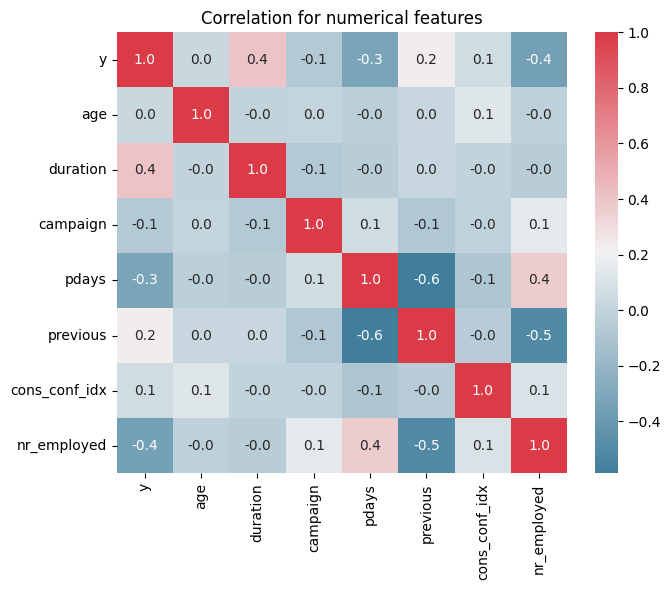

In [117]:
cols_to_plot.remove('euribor3m')
cols_to_plot.remove('emp_var_rate')
cols_to_plot.remove('cons_price_idx')

fig, axis = plt.subplots(1, 1, figsize=(7, 6))
sns.despine(fig)
sns.heatmap(data[cols_to_plot].corr(), cmap = sns.diverging_palette(230, 10, n=1001), ax = axis, annot=True, fmt = '.1f')
axis.set_title('Correlation for numerical features')
plt.tight_layout()

#### variance analysis

<Axes: >

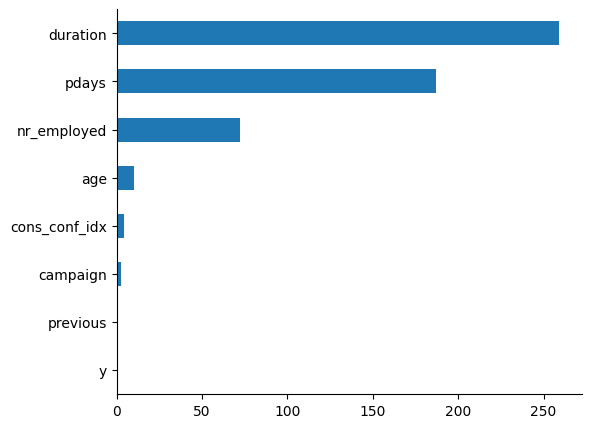

In [118]:
variance = np.std(data[cols_to_plot]).sort_values()
fig, axis = plt.subplots(figsize = (6, 5))
sns.despine(fig)
variance.plot(kind = 'barh', ax = axis)


considering that previous and pdays have a correlation higher than 0.6 and the variance of previous is lower compared to <br>
previous feature, the latter is preferred

In [119]:
cols_to_plot.remove('previous')

### data preparation

In [120]:
df_cleaned = data[cols_to_plot + relevant_cat_cols].copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41174
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   y              41160 non-null  int64   
 1   age            41160 non-null  int64   
 2   duration       41160 non-null  int64   
 3   campaign       41160 non-null  int64   
 4   pdays          41160 non-null  int64   
 5   cons_conf_idx  41160 non-null  float64 
 6   nr_employed    41160 non-null  float64 
 7   job            41160 non-null  category
 8   marital        41160 non-null  category
 9   education      41160 non-null  category
 10  default        41160 non-null  category
 11  housing        41160 non-null  category
 12  contact        41160 non-null  category
 13  month          41160 non-null  category
 14  day_of_week    41160 non-null  category
 15  poutcome       41160 non-null  category
dtypes: category(9), float64(2), int64(5)
memory usage: 2.9 MB


#### data scaling

In [121]:
# two new features were created to account for skweness in the distribution
df_cleaned['log_campaign'] = np.log(df_cleaned['campaign'])
df_cleaned['log_duration'] = np.log(df_cleaned['duration'])

num_cols = df_cleaned.select_dtypes('number').columns.tolist()
num_cols.remove('y')

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_cleaned[num_cols])
df_cleaned[num_cols] = scaler.transform(df_cleaned[num_cols])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41174
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   y              41160 non-null  int64   
 1   age            41160 non-null  float64 
 2   duration       41160 non-null  float64 
 3   campaign       41160 non-null  float64 
 4   pdays          41160 non-null  float64 
 5   cons_conf_idx  41160 non-null  float64 
 6   nr_employed    41160 non-null  float64 
 7   job            41160 non-null  category
 8   marital        41160 non-null  category
 9   education      41160 non-null  category
 10  default        41160 non-null  category
 11  housing        41160 non-null  category
 12  contact        41160 non-null  category
 13  month          41160 non-null  category
 14  day_of_week    41160 non-null  category
 15  poutcome       41160 non-null  category
 16  log_campaign   41160 non-null  float64 
 17  log_duration   41160 non-null  

#### feature encoding

In [122]:
# categorical columns
cat_cols = df_cleaned.select_dtypes('category').columns.to_list()
# ordinal columns subset
ordinal_cols = ['education', 'month', 'day_of_week']
# orders of each ordinal feature
education_order = ['unknown', 'illiterate', 'basic', 'high school', 'professional course', 'university degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
dow_order = ['mon', 'tue', 'wed', 'thu', 'fri']
# nominal features
nominal_cols = [col for col in cat_cols if col not in ordinal_cols]

# encoding ordinal features
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [education_order, month_order, dow_order], dtype = 'int64')
ord_enc.fit(df_cleaned[ordinal_cols])
df_cleaned[ordinal_cols] = ord_enc.transform(df_cleaned[ordinal_cols])

# encoding nominal features
from sklearn.preprocessing import OneHotEncoder
nom_enc = OneHotEncoder(drop = 'first', dtype = 'int64', sparse_output = False)
nom_enc.fit(df_cleaned[nominal_cols])
nominal_df = pd.DataFrame(nom_enc.transform(df_cleaned[nominal_cols]), 
                          columns = nom_enc.get_feature_names_out(nominal_cols),
                          index = df_cleaned.index)

df_cleaned.drop(columns = nominal_cols, inplace = True)
df_cleaned = pd.concat([df_cleaned, nominal_df], axis = 1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41160 entries, 0 to 41174
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   y                     41160 non-null  int64  
 1   age                   41160 non-null  float64
 2   duration              41160 non-null  float64
 3   campaign              41160 non-null  float64
 4   pdays                 41160 non-null  float64
 5   cons_conf_idx         41160 non-null  float64
 6   nr_employed           41160 non-null  float64
 7   education             41160 non-null  int64  
 8   month                 41160 non-null  int64  
 9   day_of_week           41160 non-null  int64  
 10  log_campaign          41160 non-null  float64
 11  log_duration          41160 non-null  float64
 12  job_blue-collar       41160 non-null  int64  
 13  job_entrepreneur      41160 non-null  int64  
 14  job_housemaid         41160 non-null  int64  
 15  job_management     

#### data spliting

In [123]:
from sklearn.model_selection import train_test_split
y = df_cleaned.pop('y')
x = df_cleaned
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 1)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(28812, 31) (12348, 31)
(28812,) (12348,)


### model experiments and performance

#### parametric model: logistic regression

In [124]:
import statsmodels.api as sm
lr = sm.Logit(y_train, x_train).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.216096
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                28812
Model:                          Logit   Df Residuals:                    28781
Method:                           MLE   Df Model:                           30
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.3862
Time:                        11:24:33   Log-Likelihood:                -6226.2
converged:                       True   LL-Null:                       -10143.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
age                     -0.0747      0.029     -2.573      0.010      -0.132      -0.018
duration                 0.2298      0.046      5.047      0.000       0.141       0.319
campaign                 0.1856      0.066      2.815      0.005       0.056       0.315
pdays                   -0.1188      0.050     -2.386      0.017      -0.216      -0.021
cons_conf_idx            0.3507      0.023     15.304      0.000       0.306       0.396
nr_employed             -0.7546      0.026    -29.388      0.000      -0.805      -0.704
education               -0.2243      0.017    -13.495      0.000      -0.257      -0.192
month                   -0.1273      0.012    -10.662      0.000      -0.151      -0.104
day_of_week             -0.0838      0.016     -5.162      0.000      -0.116      -0.052
log_campaign            -0.1929      0.054     -3.568      0.000      -0.299      -0.087
log_duration             1.5088      0.075     20.207      0.000       1.362       1.655
job_blue-collar         -1.1502      0.075    -15.235      0.000      -1.298      -1.002
job_entrepreneur        -0.7580      0.146     -5.208      0.000      -1.043      -0.473
job_housemaid           -0.7415      0.164     -4.517      0.000      -1.063      -0.420
job_management          -0.3720      0.097     -3.818      0.000      -0.563      -0.181
job_retired             -0.1907      0.121     -1.578      0.114      -0.428       0.046
job_self-employed       -0.4630      0.138     -3.354      0.001      -0.734      -0.192
job_services            -1.0321      0.092    -11.241      0.000      -1.212      -0.852
job_student             -0.4401      0.135     -3.267      0.001      -0.704      -0.176
job_technician          -0.4454      0.071     -6.254      0.000      -0.585      -0.306
job_unemployed          -0.4483      0.151     -2.971      0.003      -0.744      -0.152
job_unknown             -0.7769      0.277     -2.802      0.005      -1.320      -0.234
marital_married         -0.7820      0.065    -12.074      0.000      -0.909      -0.655
marital_single          -0.7288      0.077     -9.478      0.000      -0.879      -0.578
marital_unknown         -1.4521      0.518     -2.804      0.005      -2.467      -0.437
default_unknown         -0.5059      0.075     -6.736      0.000      -0.653      -0.359
default_yes            -37.2197   8.71e+08  -4.28e-08      1.000   -1.71e+09    1.71e+09
housing_yes             -0.1899      0.046     -4.100      0.000      -0.281      -0.099
contact_telephone       -1.0528      0.065    -16.079      0.000      -1.181      -0.924
poutcome_nonexistent    -0.2619      0.064     -4.089      0.000      -0.387      -0.136
poutcome_success         0.8391      0.269      3.115      0.002       0.311       1.367
========================================================================================
"""

the coefficients suggest that most feature are statistically significant for the logistic regression model <br>
only the retirees and deafult coeficients ended up being statistically cero with a significance of 5%

Text(0.5, 1.0, 'validation performance')

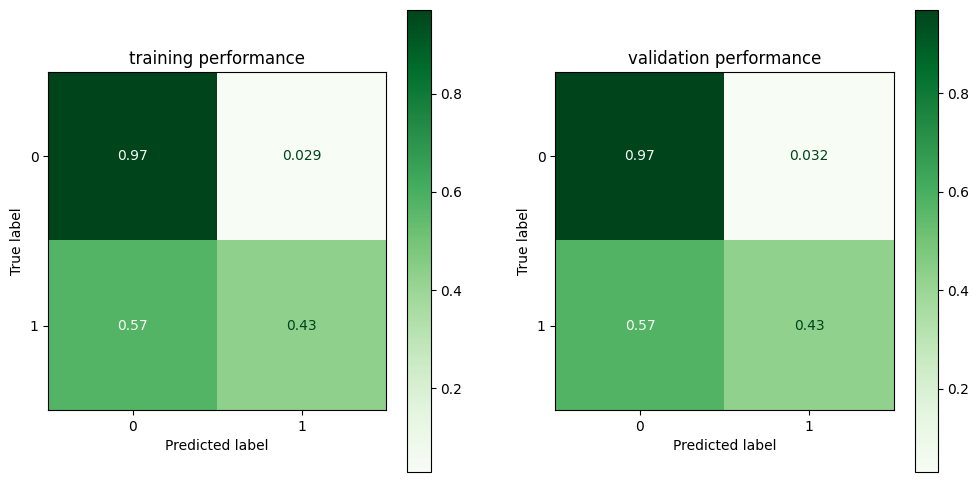

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay
threshold = 0.5
train_pred = lr.predict(x_train)
train_pred = (train_pred > threshold).astype('int64')
val_pred = lr.predict(x_val)
val_pred = (val_pred > threshold).astype('int64')
fig, axis = plt.subplots(1, 2, figsize = (12, 6))
ConfusionMatrixDisplay.from_predictions(y_true = y_train, y_pred = train_pred, normalize = 'true', cmap='Greens', ax = axis[0])
ConfusionMatrixDisplay.from_predictions(y_true = y_val, y_pred = val_pred, normalize = 'true', cmap='Greens', ax = axis[1])
axis[0].set_title('training performance')
axis[1].set_title('validation performance')

In [127]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp)
    return 1 - tnr

results_df = pd.DataFrame()
results_df['f1_score'] = [f1_score(y_train, train_pred), f1_score(y_val, val_pred)]
results_df['recall'] = [recall_score(y_train, train_pred), recall_score(y_val, val_pred)]
results_df['precision'] = [precision_score(y_train, train_pred), precision_score(y_val, val_pred)]
results_df['fpr'] = [fpr_score(y_train, train_pred, neg_label = 0, pos_label = 1), fpr_score(y_val, val_pred, neg_label = 0, pos_label = 1)]
results_df.index = ['training', 'validation']
results_df

,f1_score,recall,precision,fpr
training,0.516871,0.429452,0.648976,0.029492
validation,0.508155,0.425593,0.630458,0.031669


since the parametric model displays a consistent performance over training and unseen data it is worht exploring <br>
how the decision threshold for the positive label on the predictions might improve model performance on both <br>
recall and precision, which are the interest variables on this problem

Text(0.5, 1.0, 'precision-recall curve')

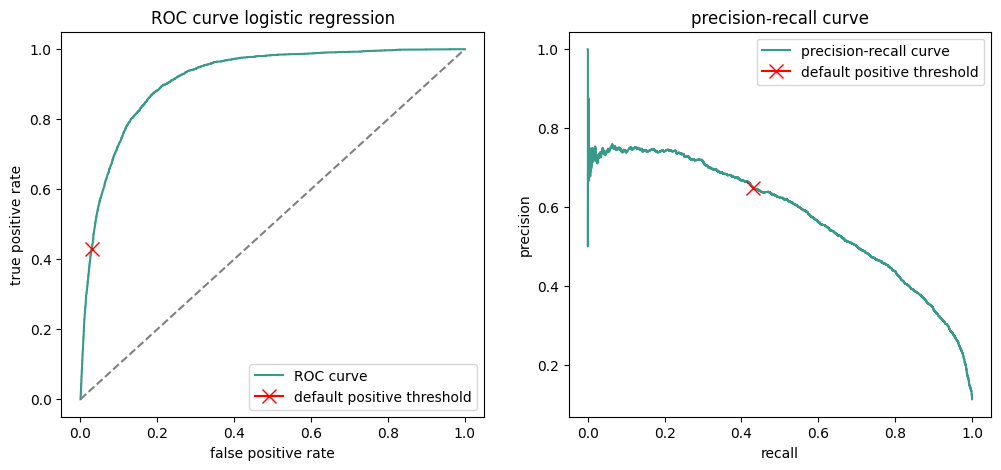

In [135]:
from sklearn.metrics import roc_curve, precision_recall_curve

train_prob = lr.predict(x_train)
fpr, tpr, threshold = roc_curve(y_train, train_prob) # roc curve results
precision, recall, _ = precision_recall_curve(y_train, train_prob, pos_label = 1)

fig, axis = plt.subplots(1, 2, figsize = (12, 5))
axis[0].plot(fpr, tpr, color = '#379A8B', label = 'ROC curve') # roc curve
axis[0].plot([0, 1], [0, 1], color = 'grey', linestyle = '--') # diagonal line
axis[0].plot(fpr_score(y_train, train_pred, neg_label = 0, pos_label = 1), 
          recall_score(y_train, train_pred), 
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold') # marker for certain prediction

axis[0].set_ylabel('true positive rate') # same as recall score
axis[0].set_xlabel('false positive rate')
axis[0].legend(loc = 'lower right')
axis[0].set_title('ROC curve logistic regression')

axis[1].plot(recall, precision, color = '#379A8B', label = 'precision-recall curve')
axis[1].plot(recall_score(y_train, train_pred),
          precision_score(y_train, train_pred),
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold')

axis[1].set_ylabel('precision')
axis[1].set_xlabel('recall')
axis[1].legend(loc = 'best')
axis[1].set_title('precision-recall curve')

Text(0.5, 1.0, 'precision-recall curve')

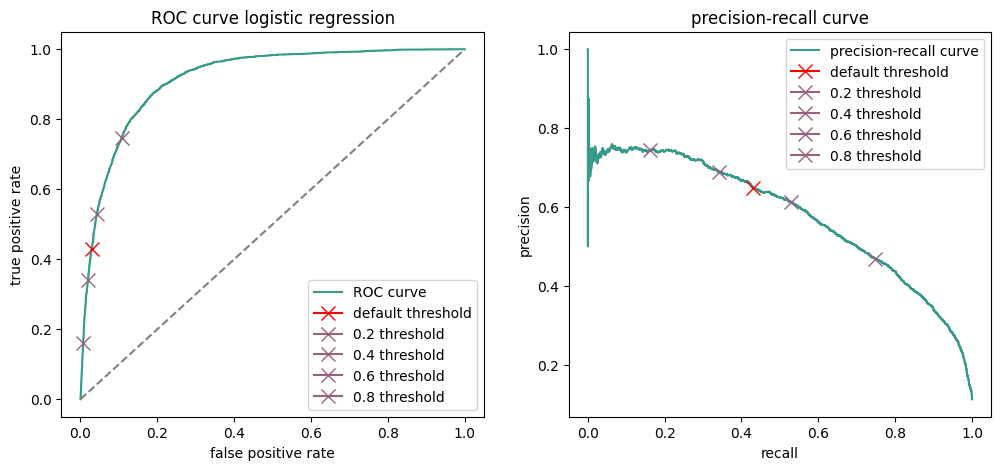

In [170]:
thresholds = np.arange(0.2, 1, 0.2).tolist()
train_prob = lr.predict(x_train)
pred_in_thresholds = {k: 0 for k in thresholds}

for t in range(len(pred_in_thresholds.keys())):
    temp_pred = (train_prob > thresholds[t]).astype('int64')
    pred_in_thresholds[thresholds[t]] = temp_pred
    
pred_in_thresholds = pd.DataFrame(pred_in_thresholds)


fpr, tpr, threshold = roc_curve(y_train, train_prob) # roc curve results
precision, recall, _ = precision_recall_curve(y_train, train_prob, pos_label = 1)

fig, axis = plt.subplots(1, 2, figsize = (12, 5))
axis[0].plot(fpr, tpr, color = '#379A8B', label = 'ROC curve') # roc curve
axis[0].plot([0, 1], [0, 1], color = 'grey', linestyle = '--') # diagonal line
axis[0].plot(fpr_score(y_train, train_pred, neg_label = 0, pos_label = 1), 
          recall_score(y_train, train_pred), 
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold') # marker for certain prediction

axis[0].set_ylabel('true positive rate') # same as recall score
axis[0].set_xlabel('false positive rate')
axis[0].set_title('ROC curve logistic regression')

axis[1].plot(recall, precision, color = '#379A8B', label = 'precision-recall curve')
axis[1].plot(recall_score(y_train, train_pred),
          precision_score(y_train, train_pred),
          marker = 'x', 
          markersize = 10, 
          color = 'red', 
          label = 'default threshold')

for t in pred_in_thresholds.columns:
    axis[0].plot(
        fpr_score(y_train, pred_in_thresholds[t], neg_label = 0, pos_label = 1), 
        recall_score(y_train, pred_in_thresholds[t]), 
        marker = 'x', 
        markersize = 10, 
        color = '#9A607F', 
        label = str(round(t,1)) + ' threshold'
    )
    axis[1].plot(
        recall_score(y_train, pred_in_thresholds[t]),
        precision_score(y_train, pred_in_thresholds[t]),
        marker = 'x', 
        markersize = 10, 
        color = '#9A607F', 
        label = str(round(t,1)) + ' threshold'
    )
axis[0].legend()
axis[1].legend()
axis[1].set_ylabel('precision')
axis[1].set_xlabel('recall')
axis[1].set_title('precision-recall curve')